# jitcsim tutorial

### Simulation of the Kuramoto model.
The parameter of the model is coupling.
The initial phase also could be changed in repeated simulations.
The output is plotting the Kuramoto order parameter vs time.

In [1]:
import os
import numpy as np
import pylab as plt
from numpy import pi
import networkx as nx
from numpy.random import uniform, normal
from jitcsim.visualization import plot_order
from jitcsim.models.kuramoto import Kuramoto_II

In [2]:
np.random.seed(1)

N = 30
alpha0 = 0.1
coupling0 = 0.5 / (N - 1)
omega0 = normal(0, 0.1, N)
initial_state = uniform(-pi, pi, N)
adj = nx.to_numpy_array(nx.complete_graph(N), dtype=int)

parameters = {
    'N': N,                             # number of nodes
    'adj': adj,                         # adjacency matrix
    't_initial': 0.,                    # initial time of integration
    "t_final": 100,                     # final time of integration
    't_transition': 2.0,                # transition time
    "interval": 1.0,                    # time interval for sampling

    "alpha": alpha0,                    # frustration
    "omega": omega0,                    # initial angular frequencies
    'initial_state': initial_state,     # initial phase of oscillators

    'integration_method': 'dopri5',     # integration method
    'control': ['coupling'],            # control parameters

    "use_omp": False,                   # use OpenMP
    "output": "data",                   # output directory
    "modulename": "km"                  # compiled filename
}

In [3]:
# make an instance of the model
sol = Kuramoto_II(parameters)
sol.compile()

# run the simulation by setting the control parameters
controls = [coupling0]
data = sol.simulate(controls)
x = data['x']
t = data['t']

saving file to data/km342226.so


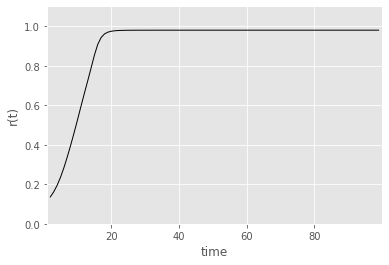

In [4]:
# calculate the Kuramoto order parameter
order = sol.order_parameter(x)

# plot order parameter vs time
plot_order(t,
           order,
           filename="data/01.png",
           xlabel="time", 
           ylabel="r(t)",
           close_fig=False);